In [3]:
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rc
rc("font", family = "Malgun Gothic")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
db = cx_Oracle.connect("c##lm", "lm", "localhost:1521/xe")
cursor = db.cursor()
cursor.execute("select * from CUSTOMERDATA")
x = cursor.fetchall()

customerdata = pd.DataFrame(x)

cursor.execute("select column_name from user_tab_columns where table_name = 'CUSTOMERDATA'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
        
customerdata.columns = list1

In [3]:
customerdata["14_1분기"].fillna(0, inplace = True)
customerdata["14_2분기"].fillna(0, inplace = True)
customerdata["14_3분기"].fillna(0, inplace = True)
customerdata["14_4분기"].fillna(0, inplace = True)
customerdata["15_1분기"].fillna(0, inplace = True)
customerdata["15_2분기"].fillna(0, inplace = True)
customerdata["15_3분기"].fillna(0, inplace = True)
customerdata["15_4분기"].fillna(0, inplace = True)

In [4]:
customerdata["14_1분기"] = round(customerdata["14_1분기"] * 1.0109552634860561)
customerdata["14_2분기"] = round(customerdata["14_2분기"] * 1.005856410415038)
customerdata["14_3분기"] = round(customerdata["14_3분기"] * 1.0238994118951612)
customerdata["14_4분기"] = round(customerdata["14_4분기"] * 0.9669899689775655)
customerdata["15_1분기"] = round(customerdata["15_1분기"] * 1.0109552634859216)
customerdata["15_2분기"] = round(customerdata["15_2분기"] * 1.005856410415038)
customerdata["15_3분기"] = round(customerdata["15_3분기"] * 1.0238994118951612)
customerdata["15_4분기"] = round(customerdata["15_4분기"] * 0.9669899689775655)

In [5]:
customerdata["분기 총변화"] = (
    customerdata["14_2분기변화"]+
    customerdata["14_3분기변화"]+
    customerdata["14_4분기변화"]+
    customerdata["15_1분기변화"]+
    customerdata["15_2분기변화"]+
    customerdata["15_3분기변화"]+
    customerdata["15_4분기변화"]
)

In [6]:
def get_loss_target(amount):
    cat = ''
    if amount < 0: cat = 1
    else: cat = 0
    return cat

In [7]:
customerdata["감소고객"] = customerdata["분기 총변화"].apply(lambda x : get_loss_target(x))

In [8]:
def get_Rrank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 4: cat = 1
    elif amount < 8: cat = 2
    elif amount < 31: cat = 3
    elif amount < 183: cat = 4
    else : cat = 5
    
    return cat

In [9]:
def get_Frank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 618: cat = 11
    elif amount < 772: cat = 10
    elif amount < 938: cat = 9
    elif amount < 1124: cat = 8
    elif amount < 1333: cat = 7
    elif amount < 1556: cat = 6
    elif amount < 1808: cat = 5
    elif amount < 2114: cat = 4
    elif amount < 2541: cat = 3
    elif amount < 4000: cat = 2
    else : cat = 1
    
    return cat

In [10]:
def get_Mrank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 8000000: cat = 11
    elif amount < 10000000: cat = 10
    elif amount < 12000000: cat = 9
    elif amount < 14500000: cat = 8
    elif amount < 17500000: cat = 7
    elif amount < 22000000: cat = 6
    elif amount < 32000000: cat = 5
    elif amount < 50000000: cat = 4
    elif amount < 80000000: cat = 3
    elif amount < 120000000: cat = 2
    else : cat = 1
    
    return cat

In [11]:
def get_Frank2(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 538: cat = 11
    elif amount < 675: cat = 10
    elif amount < 820: cat = 9
    elif amount < 987: cat = 8
    elif amount < 1171: cat = 7
    elif amount < 1370: cat = 6
    elif amount < 1592: cat = 5
    elif amount < 1867: cat = 4
    elif amount < 2247: cat = 3
    elif amount < 3500: cat = 2
    else : cat = 1
    
    return cat

In [12]:
def get_Mrank2(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 6600000: cat = 11
    elif amount < 8700000: cat = 10
    elif amount < 11000000: cat = 9
    elif amount < 13000000: cat = 8
    elif amount < 15000000: cat = 7
    elif amount < 20000000: cat = 6
    elif amount < 27000000: cat = 5
    elif amount < 43000000: cat = 4
    elif amount < 70000000: cat = 3
    elif amount < 100000000: cat = 2
    else : cat = 1
    
    return cat

In [13]:
def get_AMrank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 5000: cat = 11
    elif amount < 6000: cat = 10
    elif amount < 8000: cat = 9
    elif amount < 9000: cat = 8
    elif amount < 12000: cat = 7
    elif amount < 18000: cat = 6
    elif amount < 31000: cat = 5
    elif amount < 53000: cat = 4
    elif amount < 100000: cat = 3
    elif amount < 150000: cat = 2
    else : cat = 1
    
    return cat

In [14]:
def get_age(x):
    cat = ''
    if x == "19세 이하" or x == "20세~24세": cat = "학생층"
    elif x == "25세~29세" or x == "30세~34세": cat = "청년층"
    elif x == "35세~39세" or x == "40세~44세": cat = "중년층"
    elif x == "45세~49세" or x == "50세~54세": cat = "장년층"
    else : cat = "노년층"
    
    return cat


In [15]:
def get_region(x):
    cat = ''
    if x == "110": cat = "경기"
    elif x == "210": cat = "인천"
    elif x == "240": cat = "강원"
    elif x == "270": cat = "충북"
    elif x == "300": cat = "세종"
    elif x == "310": cat = "충남"
    elif x == "340": cat = "대전"
    elif x == "360": cat = "경북"
    elif x == "410": cat = "대구"
    elif x == "440": cat = "울산"
    elif x == "460": cat = "부산"
    elif x == "500": cat = "경남"
    elif x == "540": cat = "전북"
    elif x == "570": cat = "전남"
    elif x == "610": cat = "광주"
    elif x == "630": cat = "제주"
    else : cat = "서울"
    
    return cat

In [16]:
def make_pie(count, title = None):
    index = list(count.index)
    value = list(count)
    plt.pie(value, labels = index, autopct='%1.1f%%')
    if title:
        plt.title(title)

In [17]:
customerdata["R 등급"] = customerdata["최근성"].apply(lambda x : get_Rrank(x))
customerdata["F 등급"] = customerdata["행동 빈도"].apply(lambda x : get_Frank(x))
customerdata["M 등급"] = customerdata["구매 총액"].apply(lambda x : get_Mrank(x))
customerdata["AM 등급"] = customerdata["평균구매액"].apply(lambda x : get_AMrank(x))
customerdata["거주지역"] = customerdata["거주지역"].apply(lambda x : get_region(x))
customerdata["연령대"] = customerdata["연령대"].apply(lambda x : get_age(x))

In [18]:
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Columns: 132 entries, 고객번호 to AM 등급
dtypes: float64(21), int64(105), object(6)
memory usage: 19.5+ MB


Text(0.5, 1.0, '계절성 제거')

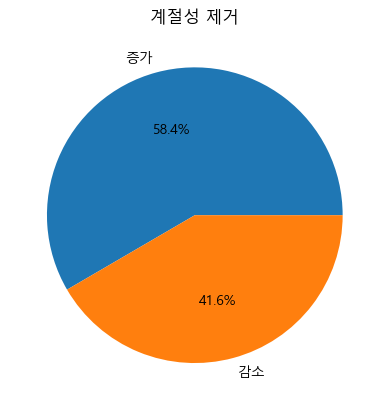

In [19]:
count = customerdata["감소고객"].value_counts()
index = list(count.index)
value = list(count)
a = plt.pie(value, labels = ["증가", "감소"], autopct='%1.1f%%')
plt.title("계절성 제거")

In [20]:
value

[11319, 8064]

In [21]:
delta1 = customerdata[customerdata["감소고객"] == 1]
delta0 = customerdata[customerdata["감소고객"] == 0]

up = delta0[['14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기', '15_3분기', '15_4분기']].sum().sum()

down = delta1[['14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기', '15_3분기', '15_4분기']].sum().sum()

Text(0.5, 1.0, '증가/감소고객 매출 차이')

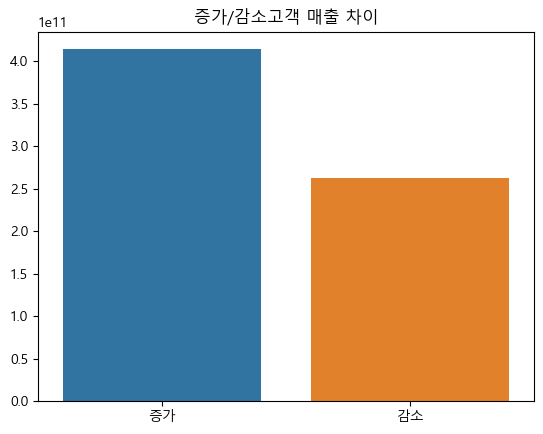

In [22]:
sns.barplot(x = ["증가","감소"], y = [up, down])
plt.title("증가/감소고객 매출 차이")

In [23]:
customerdata["14_2변화율"] = round(customerdata["14_2분기"] / customerdata["14_1분기"]* 100,2)
customerdata["14_3변화율"] = round(customerdata["14_3분기"] / customerdata["14_2분기"]* 100,2)
customerdata["14_4변화율"] = round(customerdata["14_4분기"] / customerdata["14_3분기"]* 100,2)
customerdata["15_1변화율"] = round(customerdata["15_1분기"] / customerdata["14_4분기"]* 100,2)
customerdata["15_2변화율"] = round(customerdata["15_2분기"] / customerdata["15_1분기"]* 100,2)
customerdata["15_3변화율"] = round(customerdata["15_3분기"] / customerdata["15_2분기"]* 100,2)
customerdata["15_4변화율"] = round(customerdata["15_4분기"] / customerdata["15_3분기"]* 100,2)

14754    0
Name: 감소고객, dtype: int64


<AxesSubplot:>

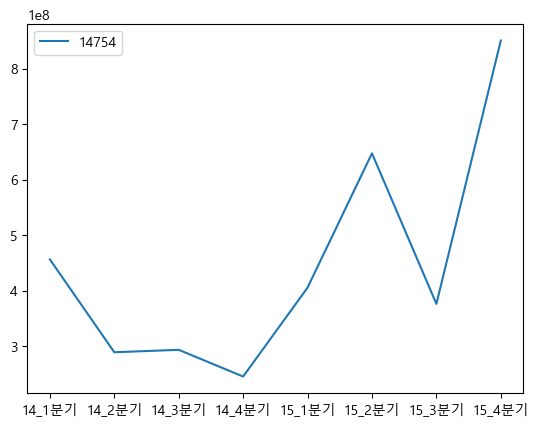

In [24]:
c = customerdata[customerdata["고객번호"] == "15999"]
print(c["감소고객"])
sns.lineplot(c[['14_1분기', '14_2분기', '14_3분기', '14_4분기','15_1분기', '15_2분기', '15_3분기', '15_4분기']].transpose())

In [25]:
delta = customerdata[customerdata["감소고객"] == 1]

In [26]:
delta["14_2예측"] = delta["14_1분기"] * 1.0320933400038665
delta["14_3예측"] = delta["14_2예측"] * 0.9269852979723926
delta["14_4예측"] = delta["14_3예측"] * 1.282609129616268
delta["15_1예측"] = delta["14_4예측"] * 0.8748904692123978
delta["15_2예측"] = delta["15_1예측"] * 1.003773385020013
delta["15_3예측"] = delta["15_2예측"] * 0.9375962335791909
delta["15_4예측"] = delta["15_3예측"] * 1.238677904420186
delta["예상이득"] = (
    delta["14_2예측"] - delta["14_2분기"]+
    delta["14_3예측"] - delta["14_3분기"]+
    delta["14_4예측"] - delta["14_4분기"]+
    delta["15_1예측"] - delta["15_1분기"]+
    delta["15_2예측"] - delta["15_2분기"]+
    delta["15_3예측"] - delta["15_3분기"]+
    delta["15_4예측"] - delta["15_4분기"]
)

In [27]:
profit = delta[["예상이득"]].sum()
int(profit)

115066924797

In [28]:
total15 = customerdata[['15_1분기', '15_2분기', '15_3분기', '15_4분기']].sum().sum()
total15

347485728658.0

In [29]:
total14 = customerdata[['14_1분기', '14_2분기', '14_3분기', '14_4분기']].sum().sum()

Text(0.5, 1.0, '예상 매출액')

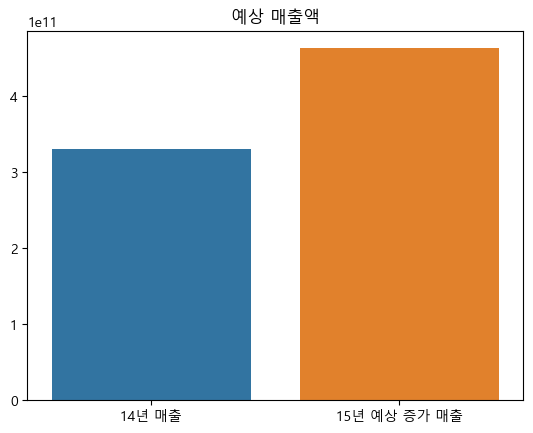

In [30]:
sns.barplot(x = ["14년 매출", "15년 예상 증가 매출"], y = [total14, total15+int(profit)])
plt.title("예상 매출액")

In [31]:
customerdata.columns

Index(['고객번호', '성별', '연령대', '거주지역', 'A선호점포', 'B선호점포', 'C선호점포', 'D선호점포',
       '선호제휴사', '선호점포',
       ...
       'F 등급', 'M 등급', 'AM 등급', '14_2변화율', '14_3변화율', '14_4변화율', '15_1변화율',
       '15_2변화율', '15_3변화율', '15_4변화율'],
      dtype='object', length=139)

In [32]:
df1 = customerdata[customerdata["R 등급"] == 1]
df0 = customerdata[customerdata["R 등급"] != 1]
df2 = df0[df0["R 등급"] != 2]

<AxesSubplot:xlabel='행동 빈도', ylabel='구매 총액'>

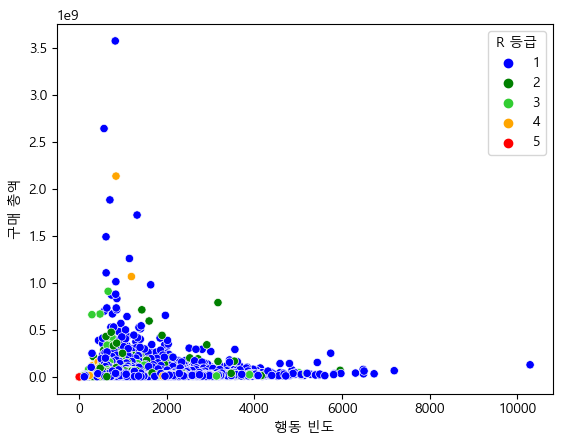

In [33]:
my_palette = ["blue", "green", "limegreen", "orange", "red"]
sns.scatterplot(data = customerdata, x = "행동 빈도", y = "구매 총액", hue="R 등급", palette=my_palette)

<AxesSubplot:xlabel='행동 빈도', ylabel='구매 총액'>

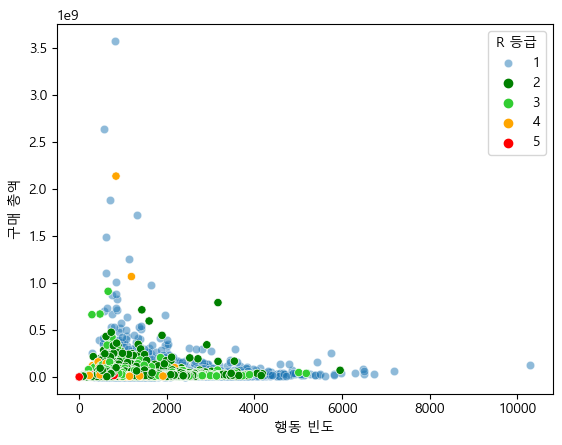

In [34]:
my_palette = ["green", "limegreen", "orange", "red"]
sns.scatterplot(data = df1, x = "행동 빈도", y = "구매 총액", palette= "blue", alpha = 0.5, label = "1")
sns.scatterplot(data = df0, x = "행동 빈도", y = "구매 총액", hue="R 등급", palette=my_palette)

<AxesSubplot:xlabel='행동 빈도', ylabel='구매 총액'>

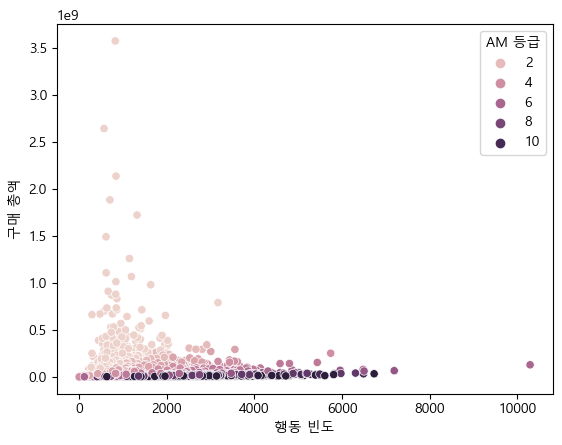

In [35]:
sns.scatterplot(data = customerdata, x = "행동 빈도", y = "구매 총액", hue = "AM 등급")

In [36]:
customerdata["AM 등급"].value_counts()

9     2808
11    2338
3     2078
7     2065
5     1946
4     1928
6     1776
10    1623
8     1077
2      945
1      799
Name: AM 등급, dtype: int64

In [37]:
c

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,...,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
14754,15999,M,중년층,서울,30.0,5.0,NaN,NaN,A,30,...,9,1,1,63.3,101.52,83.56,165.48,159.77,58.06,226.36


In [38]:
customerdata[customerdata["감소고객"] == 1]["AM 등급"].value_counts()

9     1232
11    1037
7      899
5      802
4      765
10     756
3      755
6      732
8      485
2      319
1      282
Name: AM 등급, dtype: int64

In [39]:
customerdata.columns

Index(['고객번호', '성별', '연령대', '거주지역', 'A선호점포', 'B선호점포', 'C선호점포', 'D선호점포',
       '선호제휴사', '선호점포',
       ...
       'F 등급', 'M 등급', 'AM 등급', '14_2변화율', '14_3변화율', '14_4변화율', '15_1변화율',
       '15_2변화율', '15_3변화율', '15_4변화율'],
      dtype='object', length=139)

In [40]:
count = customerdata["감소고객"].value_counts()
total = count.sum()
print(round(count/total* 100,2))

0    58.4
1    41.6
Name: 감소고객, dtype: float64


In [41]:
db = cx_Oracle.connect("c##lm", "lm", "localhost:1521/xe")
cursor = db.cursor()
cursor.execute("select * from PREDICTDATA")
x = cursor.fetchall()

predictdata = pd.DataFrame(x)

cursor.execute("select column_name from user_tab_columns where table_name = 'PREDICTDATA'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
        
predictdata.columns = list1

In [42]:
predictdata

,고객번호,성별,연령대,거주지역,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,...,명품Q15_3,명품Q15_4,기타Q14_1,기타Q14_2,기타Q14_3,기타Q14_4,기타Q15_1,기타Q15_2,기타Q15_3,기타Q15_4
0,00077,F,60세이상,460,4160660.0,5207551.0,4014420.0,4297405.0,3833980.0,4059738.0,...,125837,86062,0,0,40752,97560,0,43151,255054,393371
1,00078,F,60세이상,100,9661046.0,6476746.0,9442940.0,10077320.0,11834320.0,21860531.0,...,2784074,1837280,0,0,145803,0,0,29171,759785,5802
2,00079,F,60세이상,055,1929173.0,1926940.0,2251060.0,2298768.0,1383812.0,2223819.0,...,0,0,0,71617,17406,23208,44483,12071,11263,100470
3,00080,F,60세이상,055,1018370.0,803539.0,1184877.0,1499466.0,1274220.0,1705319.0,...,0,0,0,0,162186,28043,0,724218,51,172124
4,00081,F,60세이상,016,9648280.0,5345640.0,8569870.0,5524898.0,7236120.0,12309970.0,...,13598991,3326446,23757,17100,0,2901,657890,0,0,237928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19249,F,25세~29세,100,648790.0,720477.0,1041635.0,834577.0,11391938.0,11417164.0,...,0,0,0,0,5119,0,7077,6036,11263,16438
19379,19250,F,35세~39세,360,1224368.0,1682732.0,1291760.0,1383615.0,1396725.0,1228261.0,...,0,0,31845,57838,27135,33360,37912,19615,5120,967
19380,19251,M,30세~34세,460,1128600.0,931868.0,2229388.0,2698199.0,2909795.0,4112798.0,...,0,0,0,0,0,2949,0,7846,1075,2901
19381,19252,F,35세~39세,100,1037577.0,1223049.0,970575.0,1088815.0,850905.0,1175824.0,...,0,0,0,0,0,0,0,16094,0,0


In [43]:
predictdata["R 등급"] = predictdata["최근성"].apply(lambda x : get_Rrank(x))
predictdata["거주지역"] = predictdata["거주지역"].apply(lambda x : get_region(x))
predictdata["연령대"] = predictdata["연령대"].apply(lambda x : get_age(x))
predictdata["F 등급"] = predictdata["행동 빈도"].apply(lambda x : get_Frank2(x))
predictdata["M 등급"] = predictdata["구매 총액"].apply(lambda x : get_Mrank2(x))

In [44]:
predictdata = predictdata.dropna(subset=["최근성"])

In [45]:
predictdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19380 entries, 0 to 19382
Columns: 127 entries, 고객번호 to M 등급
dtypes: float64(22), int64(99), object(6)
memory usage: 18.9+ MB


In [46]:
predictdata

,고객번호,성별,연령대,거주지역,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,...,기타Q14_2,기타Q14_3,기타Q14_4,기타Q15_1,기타Q15_2,기타Q15_3,기타Q15_4,R 등급,F 등급,M 등급
0,00077,F,노년층,부산,4160660.0,5207551.0,4014420.0,4297405.0,3833980.0,4059738.0,...,0,40752,97560,0,43151,255054,393371,1,8,4
1,00078,F,노년층,서울,9661046.0,6476746.0,9442940.0,10077320.0,11834320.0,21860531.0,...,0,145803,0,0,29171,759785,5802,2,8,2
2,00079,F,노년층,서울,1929173.0,1926940.0,2251060.0,2298768.0,1383812.0,2223819.0,...,71617,17406,23208,44483,12071,11263,100470,1,4,7
3,00080,F,노년층,서울,1018370.0,803539.0,1184877.0,1499466.0,1274220.0,1705319.0,...,0,162186,28043,0,724218,51,172124,1,5,10
4,00081,F,노년층,서울,9648280.0,5345640.0,8569870.0,5524898.0,7236120.0,12309970.0,...,17100,0,2901,657890,0,0,237928,1,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19249,F,청년층,서울,648790.0,720477.0,1041635.0,834577.0,11391938.0,11417164.0,...,0,5119,0,7077,6036,11263,16438,1,9,4
19379,19250,F,중년층,경북,1224368.0,1682732.0,1291760.0,1383615.0,1396725.0,1228261.0,...,57838,27135,33360,37912,19615,5120,967,1,2,9
19380,19251,M,청년층,부산,1128600.0,931868.0,2229388.0,2698199.0,2909795.0,4112798.0,...,0,0,2949,0,7846,1075,2901,1,4,6
19381,19252,F,중년층,서울,1037577.0,1223049.0,970575.0,1088815.0,850905.0,1175824.0,...,0,0,0,0,16094,0,0,1,4,10


In [47]:
#for i in [10,20,30,40,50,60,70,80,90,100]:
    #count = np.percentile(predictdata["구매 총액"], i)
    #print(i, "%")
    #print(count)
    #print(len(predictdata[(predictdata["구매 총액"] <= count)]),"\n")

In [48]:
predictdata["14_1분기"].fillna(0, inplace = True)
predictdata["14_2분기"].fillna(0, inplace = True)
predictdata["14_3분기"].fillna(0, inplace = True)
predictdata["14_4분기"].fillna(0, inplace = True)
predictdata["15_1분기"].fillna(0, inplace = True)
predictdata["15_2분기"].fillna(0, inplace = True)
predictdata["15_3분기"].fillna(0, inplace = True)
predictdata["15_4분기"].fillna(0, inplace = True)

In [49]:
predictdata["14_1분기"] = round(predictdata["14_1분기"] * 1.0109552634860561)
predictdata["14_2분기"] = round(predictdata["14_2분기"] * 1.005856410415038)
predictdata["14_3분기"] = round(predictdata["14_3분기"] * 1.0238994118951612)
predictdata["14_4분기"] = round(predictdata["14_4분기"] * 0.9669899689775655)
predictdata["15_1분기"] = round(predictdata["15_1분기"] * 1.0109552634859216)
predictdata["15_2분기"] = round(predictdata["15_2분기"] * 1.005856410415038)
predictdata["15_3분기"] = round(predictdata["15_3분기"] * 1.0238994118951612)
predictdata["15_4분기"] = round(predictdata["15_4분기"] * 0.9669899689775655)

In [50]:
predictdata["14_2분기변화"] = predictdata["14_2분기"] - predictdata["14_1분기"]
predictdata["14_3분기변화"] = predictdata["14_3분기"] - predictdata["14_2분기"]
predictdata["14_4분기변화"] = predictdata["14_4분기"] - predictdata["14_3분기"]
predictdata["15_1분기변화"] = predictdata["15_1분기"] - predictdata["14_4분기"]
predictdata["15_2분기변화"] = predictdata["15_2분기"] - predictdata["15_1분기"]
predictdata["15_3분기변화"] = predictdata["15_3분기"] - predictdata["15_2분기"]
predictdata["15_4분기변화"] = predictdata["15_4분기"] - predictdata["15_3분기"]

In [51]:
predictdata["14_2분기변화율"] = round(predictdata["14_2분기"] / predictdata["14_1분기"] * 100,2)
predictdata["14_3분기변화율"] = round(predictdata["14_3분기"] / predictdata["14_2분기"] * 100,2)
predictdata["14_4분기변화율"] = round(predictdata["14_4분기"] / predictdata["14_3분기"] * 100,2)
predictdata["15_1분기변화율"] = round(predictdata["15_1분기"] / predictdata["14_4분기"] * 100,2)
predictdata["15_2분기변화율"] = round(predictdata["15_2분기"] / predictdata["15_1분기"] * 100,2)
predictdata["15_3분기변화율"] = round(predictdata["15_3분기"] / predictdata["15_2분기"] * 100,2)
predictdata["15_4분기변화율"] = round(predictdata["15_4분기"] / predictdata["15_3분기"] * 100,2)

In [52]:
columns = ["14_2분기변화율", "14_3분기변화율", "14_4분기변화율", "15_1분기변화율", "15_2분기변화율", "15_3분기변화율", "15_4분기변화율"]
for col in columns:
    predictdata[col] = predictdata[col].replace([np.inf, -np.inf], 100)

In [53]:
def deltarank(pct):
    cat = ''
    if pct <= 110 and pct > 90 : cat = 3
    elif pct <= 150 and pct > 110: cat = 2
    elif pct > 150: cat = 1
    elif pct <= 90 and pct > 75: cat = 4
    else: cat = 5
    
    return cat

In [54]:
def labelrank(pct):
    cat = ''
    if pct <= 110 and pct > 90 : cat = 2
    elif pct > 110: cat = 1
    else: cat = 3
    
    return cat

In [55]:
predictdata[["15_4분기변화율"]].describe()

,15_4분기변화율
count,19343.000000
mean,135.052486
std,450.895266
min,0.000000
25%,72.060000
50%,97.120000
75%,136.160000
max,35808.850000


<AxesSubplot:xlabel='14_2분기변화율', ylabel='Count'>

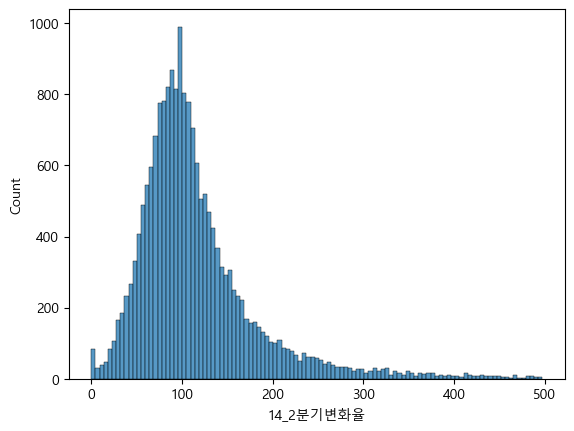

In [56]:
sns.histplot(predictdata[predictdata["14_2분기변화율"] < 500]["14_2분기변화율"])

In [57]:
predictdata["14_2변화등급"] = predictdata["14_2분기변화율"].apply(lambda x : deltarank(x))
predictdata["14_3변화등급"] = predictdata["14_3분기변화율"].apply(lambda x : deltarank(x))
predictdata["14_4변화등급"] = predictdata["14_4분기변화율"].apply(lambda x : deltarank(x))
predictdata["15_1변화등급"] = predictdata["15_1분기변화율"].apply(lambda x : deltarank(x))
predictdata["15_2변화등급"] = predictdata["15_2분기변화율"].apply(lambda x : deltarank(x))
predictdata["15_3변화등급"] = predictdata["15_3분기변화율"].apply(lambda x : deltarank(x))
predictdata["15_4변화등급"] = predictdata["15_4분기변화율"].apply(lambda x : labelrank(x))

In [58]:
predictdata.columns

Index(['고객번호', '성별', '연령대', '거주지역', '14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기',
       ...
       '15_2분기변화율', '15_3분기변화율', '15_4분기변화율', '14_2변화등급', '14_3변화등급',
       '14_4변화등급', '15_1변화등급', '15_2변화등급', '15_3변화등급', '15_4변화등급'],
      dtype='object', length=142)

In [59]:
#scaler = MinMaxScaler()
#predictdata["거주지역"] = scaler.fit_transform(predictdata["거주지역"])

In [60]:
index = ['14_2분기변화율', '14_3분기변화율', '14_4분기변화율',
       '15_1분기변화율', '15_2분기변화율', '15_3분기변화율', '15_4분기변화율']
for i in index:
    predictdata[str(i)] = np.log1p(predictdata[str(i)])

In [69]:
predictdata.columns

Index(['고객번호', '성별', '연령대', '거주지역', '14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기',
       ...
       '15_2분기변화율', '15_3분기변화율', '15_4분기변화율', '14_2변화등급', '14_3변화등급',
       '14_4변화등급', '15_1변화등급', '15_2변화등급', '15_3변화등급', '15_4변화등급'],
      dtype='object', length=142)

In [61]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(f"{model.__class__.__name__} 로그 변환된 RMSE : {np.round(rmse, 3)}")
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [62]:
def get_rmsle(model):
    pred = model.predict(X_test)
    pred = np.expm1(pred)  # 로그 역변환 (inverse log transformation)
    y_test_exp = np.expm1(y_test)  # 로그 역변환 (inverse log transformation)
    rmsle = np.sqrt(mean_squared_log_error(y_test_exp, pred))
    print(f"{model.__class__.__name__} RMSLE: {np.round(rmsle, 3)}")
    return rmsle

def get_rmsles(models):
    rmsles = []
    for model in models:
        rmsle = get_rmsle(model)
        rmsles.append(rmsle)
    return rmsles

In [63]:
pdd = predictdata.drop(["고객번호",'14_2분기변화', '14_3분기변화', '14_4분기변화', '15_1분기변화',
       '15_2분기변화', '15_3분기변화','선호제휴사','R 등급', 'F 등급',
       'M 등급', '15_4분기변화', '14_2변화등급', '14_3변화등급',
       '14_4변화등급', '15_1변화등급', '15_2변화등급', '15_3변화등급', '15_4변화등급',
       '선호점포',], axis = 1)
predictdata_ohe = pd.get_dummies(pdd)
predictdata_ohe["14_2분기변화율"].fillna(0, inplace = True)
predictdata_ohe["14_3분기변화율"].fillna(0, inplace = True)
predictdata_ohe["14_4분기변화율"].fillna(0, inplace = True)
predictdata_ohe["15_1분기변화율"].fillna(0, inplace = True)
predictdata_ohe["15_2분기변화율"].fillna(0, inplace = True)
predictdata_ohe["15_3분기변화율"].fillna(0, inplace = True)
predictdata_ohe["15_4분기변화율"].fillna(0, inplace = True)

In [64]:
y_target = predictdata_ohe["15_4분기변화율"]
X_data = predictdata_ohe.drop(["15_4분기변화율","A선호점포","B선호점포","C선호점포","D선호점포"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state = 156)

In [65]:
predictdata_ohe["15_4분기변화율"]

0        5.332284
1        4.549869
2        4.153713
3        5.244072
4        3.960432
           ...   
19378    3.721105
19379    3.731220
19380    4.087152
19381    4.392348
19382    4.101155
Name: 15_4분기변화율, Length: 19380, dtype: float64

In [66]:
predictdata_ohe["15_4분기변화율"].describe()

count    19380.000000
mean         4.605339
std          0.696065
min          0.000000
25%          4.288643
50%          4.584916
75%          4.920090
max         10.485978
Name: 15_4분기변화율, dtype: float64

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmsles(models)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [ ]:
coef = pd.Series(lr.coef_, index = X_data.columns)
coef

In [ ]:
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index = X_data.columns)
    
    coef_high = coef.sort_values(ascending = False).head(10)
    coef_low = coef.sort_values(ascending = False).tail(10)
    return coef_high, coef_low

In [ ]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr, ridge, lasso]
visualize_coefficient(models)

In [ ]:
predictdata_ohe["15_4분기변화율"].describe()

In [ ]:
def convert_values(arr):
    result = []
    for value in arr:
        if value < 90:
            result.append(3)
        elif value < 110:
            result.append(2)
        else:
            result.append(1)
    return result


In [ ]:
def compare_arrays(arr1, arr2):
    count = 0
    for i in range(len(arr1)):
        if arr1[i] == arr2[i]:
            count += 1
    return count

In [ ]:
pre = np.expm1(ridge.predict(X_test))
real = np.array(np.expm1(y_test))
pre_cat = convert_values(pre)
real_cat = convert_values(real)
matching_count = compare_arrays(pre_cat, real_cat)
print(matching_count)
round(matching_count/len(pre)*100,2)

In [ ]:
def get_scores(arr1, arr2):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(arr1)):
        if arr2[i] == 3 and arr1[i] == 3:
            TP += 1
        elif arr2[i] == 3 and arr1[i] != 3:
            FN += 1
        elif arr2[i] != 3 and arr1[i] != 3:
            TN += 1
        else:
            FP += 1
    print(f"[{TP}   {FP}]\n[{FN}   {TN}]")
    print(f"정밀도 : {round(TP/ (FP+TP)*100,2)}%")
    print(f"재현율 : {round(TP/ (FN+TP)*100,2)}%")
    print(f"정확도 : {round((TP+TN)/len(arr1)*100,2)}%")

In [ ]:
get_scores(pre_cat, real_cat)

In [ ]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring = "neg_mean_squared_error", cv = 5)
    grid_model.fit(X_data, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print("{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha : {2}".format(model.__class__.__name__,
                                                                np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [ ]:
#ridge_params = {"alpha" : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]}
#lasso_params = {"alpha" : [0.00001, 0.0001, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1.5, 10]}
#best_ridge = print_best_params(ridge, ridge_params)
#best_lasso = print_best_params(lasso, lasso_params)

In [ ]:
lr = LinearRegression()
ridge = Ridge(alpha = 40)
lasso = Lasso(alpha = 0.001)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models)

visualize_coefficient(models)

In [ ]:
pre = np.expm1(ridge.predict(X_test))
real = np.array(np.expm1(y_test))
pre_cat = convert_values(pre)
real_cat = convert_values(real)
matching_count = compare_arrays(pre_cat, real_cat)
print(matching_count)
round(matching_count/len(pre)*100,2)

In [ ]:
get_scores(pre_cat, real_cat)

In [ ]:
count = predictdata["15_4변화등급"].value_counts()
make_pie(count,"원본 파이")

In [ ]:
count = predictdata[predictdata["선호제휴점포"] == "A41"]["15_4변화등급"].value_counts()
make_pie(count)

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [11]:
import pickle

with open('../dataset/scustomerdata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [12]:
df = loaded_data
df.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00758,F,노년층,서울,37.0,54.0,NaN,NaN,A,37,A37,3879096.0,25507579.0,5745857.0,5290043.0,10555637.0,27922567.0,9408581.0,25724991.0,21522006.0,-19747326.0,-141111.0,4970621.0,17318743.0,-18571023.0,17414192.0,1,1124,114271870,101665.36,일상용품,가공식품,신선식품,가공식품,일상용품,신선식품,신선식품,가공식품,일상용품,22766102.0,0,1,7,2,2,657.57,22.53,92.07,199.54,264.53,33.70,273.42
